Katherine Kairis, kak275@pitt.edu, 12/15/2017

# Analyzing Specific L1s

In [1]:
import pickle
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
stopWords = set(stopwords.words('english'))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
f = open('VOICE_tokenized.p', 'rb')
VOICE_toks = pickle.load(f)
f.close()

f = open('VOICE_tagged.p', 'rb')
VOICE_tags = pickle.load(f)
f.close()

f = open('VOICE_native_tagged.p', 'rb')
VOICE_native_tags = pickle.load(f)
f.close()

f = open('VOICE_participant_info.p', 'rb')
participants = pickle.load(f)
f.close()

## VOICE Tagset
"CC" coordinating conjunction
"CD" cardinal number  
"DM" discourse marker  
"DT" determiner 
"EX" existential there 
"FI" formulaic items 
"FW" foreign word (non-English speech) 
"IN" preposition or subordinating conjunction  
"JJ" adjective, positive
"JJR"adjective, comparative 
"JJS"adjective, superlative 
"LA" laughter
"MD" modal verb  
"NN" noun, singular or mass
"NNS" noun, plural 
"NP" proper noun, singular
"NPS" proper noun, plural  
"PA" pause  
"PP" pronoun, personal  
"PPS" pronoun, possessive 
"PRE" pronoun, relative 
"RB" adverb, positive
"RBR" adverb, comparative 
"RE" response particle  
"RP" particle 
"TO" to, infinitive use  
"UH" interjection
"UNI" unintelligible speech 
"V" generic verb tag 
"VB verb be, base form 
"VBD" verb be, past tense
"VBN" verb be, past participle 
"VBP" verb be, present non-3rd person singular  
"VBS" verb be, contracted form 
VBZ" verb be, present 3rd person singular 
"VH" verb have, base form
"VHG" verb have, gerund or present participle
"VHP" verb have, present non-3rd person singular  
"VHS" verb have, contracted form  
"VV" other verbs than be and have, base form 
"VVD" other verbs than be and have, past tense 
"VVG"other verbs than be and have, gerund or present participle 
"VVN" other verbs than be and have, past participle  
"VVP" other verbs than be and have, present non-3rd person singular  
"VVZ" other verbs than be and have, present 3rd person singular  
"WDT" wh-determiner 
"WP" wh-pronoun  
"WRB" wh-adverb 
"XX" partial word 

## Getting speakers of chosen languages
Non-native L1s selected: Polish, Korean, Finnish, Danish, Turkish, and Portuguese  
Will compare all non-native L1s to English

In [3]:
def get_monolingual_speakers(participant_dict, language):
    speakers = []
    for p in participant_dict.keys():
        L1s = participant_dict[p]['L1']
        if(len(L1s) == 1 and language in L1s):
            speakers.append(p)
            
    return speakers

In [4]:
eng_speakers = get_monolingual_speakers(participants, 'eng')
pol_speakers = get_monolingual_speakers(participants, 'pol')
kor_speakers = get_monolingual_speakers(participants, 'kor')
fin_speakers = get_monolingual_speakers(participants, 'fin')
dan_speakers = get_monolingual_speakers(participants, 'dan')
tur_speakers = get_monolingual_speakers(participants, 'tur')
hun_speakers = get_monolingual_speakers(participants, 'hun')
por_speakers = get_monolingual_speakers(participants, 'por')
rus_speakers = get_monolingual_speakers(participants, 'rus')
mlt_speakers = get_monolingual_speakers(participants, 'mlt')
lav_speakers = get_monolingual_speakers(participants, 'lav')

In [5]:
print("English speakers:", len(eng_speakers))
print("Polish speakers:", len(pol_speakers))
print("Korean speakers:", len(kor_speakers))
print("Finnish speakers:", len(fin_speakers))
print("Danish speakers:", len(dan_speakers))
print("Turkish speakers:", len(tur_speakers))
print("Hungarian speakers:", len(hun_speakers))
print("Portuguese speakers:", len(por_speakers))
print("Russian speakers:", len(rus_speakers))
print("Maltese speakers:", len(mlt_speakers))
print("Latvian speakers:", len(lav_speakers))

English speakers: 62
Polish speakers: 35
Korean speakers: 14
Finnish speakers: 51
Danish speakers: 35
Turkish speakers: 14
Hungarian speakers: 13
Portuguese speakers: 21
Russian speakers: 22
Maltese speakers: 22
Latvian speakers: 19


In [6]:
#Get the tokens for each speaker listed in the "speakers" list
def get_tagged_utterances(tokens, speakers): 
    utterances = []
    for conversation in tokens.keys():
        for pair in tokens[conversation]:
            if(pair[1] in speakers):
                utterances.append(tokens[conversation][pair])
                
    return utterances

In [7]:
#Get the tokens from the speech of the English, Korean, Finnish, Turkish, Danish, Portuguese, and Polish speakers
eng_speech = get_tagged_utterances(VOICE_native_tags, eng_speakers)
kor_speech = get_tagged_utterances(VOICE_tags, kor_speakers)
fin_speech = get_tagged_utterances(VOICE_tags, fin_speakers)
tur_speech = get_tagged_utterances(VOICE_tags, tur_speakers)
dan_speech = get_tagged_utterances(VOICE_tags, dan_speakers)
por_speech = get_tagged_utterances(VOICE_tags, por_speakers)
pol_speech = get_tagged_utterances(VOICE_tags, pol_speakers)

## Trigrams

In [8]:
def get_trigrams(li):
    trigram_list = []
    for trigram in list(nltk.trigrams(li)):
        if len(trigram) > 0:
            trigram_list.append(trigram)
            
    return trigram_list
        

In [9]:
"""
Some tags to get rid of: BR(breathing), PA(pause), UH(interjections and hesitations), UNI(unintelligible), UNK(unknown)
https://www.univie.ac.at/voice/page/documents/VOICE_tagging_manual.pdf
"""   
def remove_tags(li):
    unwanted_tags = ["BRfBR", "PAfPA", "UHfUH", "UNIfUNI", "UNKfNN", "LAfLA", "XXfXX"]
    return [pair for pair in li if pair[1] not in unwanted_tags]

'\nSome tags to get rid of: BR(breathing), PA(pause), UH(interjections and hesitations), UNI(unintelligible), UNK(unknown)\nhttps://www.univie.ac.at/voice/page/documents/VOICE_tagging_manual.pdf\n'

In [10]:
#Returns a list of (word, tag) pairs
def get_pairs(li):
    tokens = []
    for u in li:
        for w in u:
            tokens.append(w)
    return tokens

In [11]:
def get_tags(li):
    return[pair[1] for pair in li]

In [12]:
#Get the tokens for each L1 group
eng_toks = get_pairs(eng_speech)
eng_toks = remove_tags(eng_toks)
eng_tags = get_tags(eng_toks)

kor_toks = get_pairs(kor_speech)
kor_toks = remove_tags(kor_toks)
kor_tags = get_tags(kor_toks)

fin_toks = get_pairs(fin_speech)
fin_toks = remove_tags(fin_toks)
fin_tags = get_tags(fin_toks)

tur_toks = get_pairs(tur_speech)
tur_toks = remove_tags(tur_toks)
tur_tags = get_tags(tur_toks)

dan_toks = get_pairs(dan_speech)
dan_toks = remove_tags(dan_toks)
dan_tags = get_tags(dan_toks)

por_toks = get_pairs(por_speech)
por_toks = remove_tags(por_toks)
por_tags = get_tags(por_toks)

pol_toks = get_pairs(pol_speech)
pol_toks = remove_tags(pol_toks)
pol_tags = get_tags(pol_toks)

In [13]:
#Get the part of speech trigrams for each L1 group
eng_tag_trigrams = get_trigrams(eng_tags)
kor_tag_trigrams = get_trigrams(kor_tags)
fin_tag_trigrams = get_trigrams(fin_tags)
tur_tag_trigrams = get_trigrams(tur_tags)
dan_tag_trigrams = get_trigrams(dan_tags)
por_tag_trigrams = get_trigrams(por_tags)
pol_tag_trigrams = get_trigrams(pol_tags)

### Most frequent part-of-speech trigrams for each L1 group

In [14]:
#Create frequency dictionaries containing the most common part of speech trigrams for each L1
eng_freq = nltk.FreqDist(eng_tag_trigrams)
kor_freq = nltk.FreqDist(kor_tag_trigrams)
fin_freq = nltk.FreqDist(fin_tag_trigrams)
tur_freq = nltk.FreqDist(tur_tag_trigrams)
dan_freq = nltk.FreqDist(dan_tag_trigrams)
por_freq = nltk.FreqDist(por_tag_trigrams)
pol_freq = nltk.FreqDist(pol_tag_trigrams)

In [15]:
#Create a data frame containing each L1's 20 most common part of speech trigram
trigram_df = pd.DataFrame(
    {"L1=English": [t[0] for t in eng_freq.most_common(20)],
     "L1=Korean": [t[0] for t in kor_freq.most_common(20)],
     "L1=Finnish": [t[0] for t in fin_freq.most_common(20)],
     "L1=Turkish": [t[0] for t in tur_freq.most_common(20)],
     "L1=Danish": [t[0] for t in dan_freq.most_common(20)],
     "L1=Portuguese": [t[0] for t in por_freq.most_common(20)],
     "L1=Polish": [t[0] for t in pol_freq.most_common(20)]
    }
)

trigram_df

,L1=Danish,L1=English,L1=Finnish,L1=Korean,L1=Polish,L1=Portuguese,L1=Turkish
0,"(INfIN, DTfDT, NNfNN)","(INfIN, DTfDT, NNfNN)","(INfIN, DTfDT, NNfNN)","(REfRE, REfRE, REfRE)","(INfIN, DTfDT, NNfNN)","(INfIN, DTfDT, NNfNN)","(INfIN, DTfDT, NNfNN)"
1,"(DTfDT, NNfNN, INfIN)","(DTfDT, NNfNN, INfIN)","(DTfDT, NNfNN, INfIN)","(INfIN, DTfDT, NNfNN)","(REfRE, REfRE, REfRE)","(DTfDT, NNfNN, INfIN)","(DTfDT, NNfNN, INfIN)"
2,"(DTfDT, JJfJJ, NNfNN)","(DTfDT, JJfJJ, NNfNN)","(REfRE, REfRE, REfRE)","(DTfDT, JJfJJ, NNfNN)","(DTfDT, NNfNN, INfIN)","(NNfNN, INfIN, DTfDT)","(DTfDT, JJfJJ, NNfNN)"
3,"(REfRE, REfRE, REfRE)","(NNfNN, INfIN, DTfDT)","(DTfDT, JJfJJ, NNfNN)","(DTfDT, NNfNN, INfIN)","(NNfNN, INfIN, DTfDT)","(DTfDT, JJfJJ, NNfNN)","(NNfNN, INfIN, DTfDT)"
4,"(NNfNN, INfIN, DTfDT)","(REfRE, REfRE, REfRE)","(NNfNN, INfIN, DTfDT)","(NNfNN, INfIN, DTfDT)","(DTfDT, JJfJJ, NNfNN)","(PPfPP, MDfMD, VVfVV)","(INfIN, DTfDT, JJfJJ)"
5,"(INfIN, DTfDT, JJfJJ)","(PPfPP, MDfMD, VVfVV)","(INfIN, DTfDT, JJfJJ)","(FWfFW, FWfFW, FWfFW)","(PPfPP, MDfMD, VVfVV)","(INfIN, DTfDT, JJfJJ)","(JJfJJ, NNfNN, INfIN)"
6,"(JJfJJ, NNfNN, INfIN)","(INfIN, DTfDT, JJfJJ)","(PPfPP, MDfMD, VVfVV)","(PPfPP, MDfMD, VVfVV)","(INfIN, DTfDT, JJfJJ)","(TOfTO, VVfVV, DTfDT)","(TOfTO, VVfVV, DTfDT)"
7,"(PPfPP, MDfMD, VVfVV)","(NNfNN, INfIN, NNfNN)","(JJfJJ, NNfNN, INfIN)","(DTfDT, NNfNN, NNfNN)","(DTfDT, NNfNN, NNfNN)","(PPfPP, VVPfVVP, RBfRB)","(PPfPP, MDfMD, VVfVV)"
8,"(DTfDT, NNfNN, NNfNN)","(JJfJJ, NNfNN, INfIN)","(PPfPP, VVPfVVP, RBfRB)","(CDfCD, CDfCD, CDfCD)","(PPfPP, VVPfVVP, RBfRB)","(INfIN, DTfDT, NNSfNNS)","(DTfDT, JJfJJ, NNSfNNS)"
9,"(PPfPP, VVPfVVP, PPfPP)","(PPfPP, VVPfVVP, PPfPP)","(INfIN, DTfDT, NNSfNNS)","(NNfNN, NNfNN, INfIN)","(INfIN, DTfDT, NNSfNNS)","(JJfJJ, NNfNN, INfIN)","(DTfDT, NNfNN, CCfCC)"


### Most common part-of-speech trigrams in Engish compare to other L1s

In [16]:
#For each trigram in the common English trigram, calculate its proportion for each of the seven languages
eng_top_trigrams = [t[0] for t in eng_freq.most_common(15)]

eng_trigrams_df = pd.DataFrame(index=eng_top_trigrams, columns = ["L1=English", "L1=Danish", "L1=Finnish", "L1=Korean", "L1=Polish", "L1=Portuguese", "L1=Turkish"])

for trigram in eng_top_trigrams:
    eng_trigrams_df["L1=English"][trigram]= eng_freq[trigram]/len(eng_tag_trigrams)
    eng_trigrams_df["L1=Danish"][trigram]= dan_freq[trigram]/len(dan_tag_trigrams)
    eng_trigrams_df["L1=Finnish"][trigram]= fin_freq[trigram]/len(fin_tag_trigrams)
    eng_trigrams_df["L1=Korean"][trigram]= kor_freq[trigram]/len(kor_tag_trigrams)
    eng_trigrams_df["L1=Polish"][trigram]= pol_freq[trigram]/len(pol_tag_trigrams)
    eng_trigrams_df["L1=Portuguese"][trigram]= por_freq[trigram]/len(por_tag_trigrams)
    eng_trigrams_df["L1=Turkish"][trigram]= tur_freq[trigram]/len(tur_tag_trigrams)
    
eng_trigrams_df

,L1=English,L1=Danish,L1=Finnish,L1=Korean,L1=Polish,L1=Portuguese,L1=Turkish
"(INfIN, DTfDT, NNfNN)",0.0149823,0.0156791,0.0155236,0.0107851,0.0193401,0.0175261,0.0199672
"(DTfDT, NNfNN, INfIN)",0.0120859,0.0138714,0.0124894,0.008134,0.0115941,0.0148972,0.0153654
"(DTfDT, JJfJJ, NNfNN)",0.00937695,0.0122731,0.011184,0.00897753,0.00918593,0.0100438,0.0135715
"(NNfNN, INfIN, DTfDT)",0.00762659,0.00920957,0.0101609,0.0066277,0.0103528,0.0101786,0.0116996
"(REfRE, REfRE, REfRE)",0.00760575,0.0116452,0.0120308,0.0204856,0.012612,0.003303,0.00194993
"(PPfPP, MDfMD, VVfVV)",0.00562617,0.00477604,0.00490404,0.00560342,0.00769632,0.00795416,0.0053038
"(INfIN, DTfDT, JJfJJ)",0.00479267,0.0067169,0.00687976,0.00289209,0.00640532,0.00640377,0.00904766
"(NNfNN, INfIN, NNfNN)",0.00425089,0.00355824,0.0033164,0.00373561,0.00397229,0.00471857,0.00452383
"(JJfJJ, NNfNN, INfIN)",0.00420921,0.0063744,0.00483347,0.00451889,0.00402195,0.00532524,0.00748772
"(PPfPP, VVPfVVP, PPfPP)",0.00406335,0.00422423,0.00381033,0.00265108,0.00206063,0.00444894,0.00249591


In [17]:
eng_trigram_df = {}
eng_freq.most_common(20)

[(('INfIN', 'DTfDT', 'NNfNN'), 719),
 (('DTfDT', 'NNfNN', 'INfIN'), 580),
 (('DTfDT', 'JJfJJ', 'NNfNN'), 450),
 (('NNfNN', 'INfIN', 'DTfDT'), 366),
 (('REfRE', 'REfRE', 'REfRE'), 365),
 (('PPfPP', 'MDfMD', 'VVfVV'), 270),
 (('INfIN', 'DTfDT', 'JJfJJ'), 230),
 (('NNfNN', 'INfIN', 'NNfNN'), 204),
 (('JJfJJ', 'NNfNN', 'INfIN'), 202),
 (('PPfPP', 'VVPfVVP', 'PPfPP'), 195),
 (('PPfPP', 'VVPfVVP', 'RBfRB'), 188),
 (('DTfDT', 'NNfNN', 'NNfNN'), 186),
 (('PPfPP', 'VBSfVBS', 'RBfRB'), 186),
 (('INfIN', 'DTfDT', 'NNSfNNS'), 176),
 (('RBfRB', 'INfIN', 'DTfDT'), 158),
 (('PPfPP', 'VBPfVBP', 'VVGfVVG'), 157),
 (('DTfDT', 'NNfNN', 'CCfCC'), 154),
 (('TOfTO', 'VVfVV', 'INfIN'), 151),
 (('INfIN', 'PPfPP', 'VVPfVVP'), 148),
 (('DTfDT', 'NNfNN', 'PPfPP'), 144)]

### Get native speaker trigram outliers (in terms of frequency vs. other L1s)

In [18]:
#For each trigram in the common English trigram, calculate its average frequency among the non-native
#speakers. If the trigram's frequency in English is 1.5 times greater than this average, add it to the more_common
#dictionary. If the trigram's frequency in English is 15 times less than this average, add it to the
#less_common dictionaries.
more_common = {}
less_common = {}

for trigram in eng_freq:
    #trigram = trigram[0]
    
    avg = 0
    avg = avg + (kor_freq[trigram] / len(kor_tag_trigrams))
    avg = avg + (fin_freq[trigram] / len(fin_tag_trigrams))
    avg = avg + (tur_freq[trigram] / len(tur_tag_trigrams))
    avg = avg + (dan_freq[trigram] / len(dan_tag_trigrams))
    avg = avg + (por_freq[trigram] / len(por_tag_trigrams))
    avg = avg + (pol_freq[trigram] / len(pol_tag_trigrams))
    
    avg /= 6
    
    eng_percent = (eng_freq[trigram] / len(eng_tag_trigrams))
    if eng_percent > (avg * 2) and eng_freq[trigram] > 5:
        more_common[trigram] = eng_freq[trigram]
        
        
    if eng_percent < (avg * 0.5) and eng_freq[trigram] > 5:
        less_common[trigram] = eng_freq[trigram]

#### Native trigram outliers -- more frequent that other L1s.

In [19]:
#Show the trigrams that are particularly more common among the native English than the non-native speakers
for trigram in sorted(more_common, key=more_common.get, reverse=True)[:10]:
    print(trigram)
    
    print("\tEnglish: " + str(eng_freq[trigram] / len(eng_tag_trigrams)))
    print("\tFinnish: " + str(fin_freq[trigram] / len(fin_tag_trigrams)))
    print("\tKorean: " + str(kor_freq[trigram] / len(kor_tag_trigrams)))
    print("\tTurkish: " + str(tur_freq[trigram] / len(tur_tag_trigrams)))
    print("\tDanish: " + str(dan_freq[trigram] / len(dan_tag_trigrams)))
    print("\tPortuguese: " + str(por_freq[trigram] / len(por_tag_trigrams)))
    print("\tPolish: " + str(pol_freq[trigram] / len(pol_tag_trigrams)))

('PPfPP', 'VHPfVHP', 'VVNfVVN')
	English: 0.002208793498645551
	Finnish: 0.00091730172170477
	Korean: 0.0006627703801891908
	Turkish: 0.0006239762889010217
	Danish: 0.0012748791718993797
	Portuguese: 0.0006066734074823053
	Polish: 0.001390302639092331
('PPfPP', 'VBDfVBD', 'VVGfVVG')
	English: 0.0013752865180245884
	Finnish: 0.0003175275190516511
	Korean: 6.0251852744471894e-05
	Turkish: 0.00015599407222525544
	Danish: 0.0004186170415191993
	Portuguese: 0.0013481631277384564
	Polish: 0.0004965366568186896
('VBPfVBP', 'VVGfVVG', 'INfIN')
	English: 0.0013336111689935403
	Finnish: 0.0009525825571549535
	Korean: 6.0251852744471894e-05
	Turkish: 0.0007019733250136495
	Danish: 0.0006088975149370171
	Portuguese: 0.0009437141894169194
	Polish: 0.0007199781523870999
('DTfDT', 'VBSfVBS', 'RBfRB')
	English: 0.0010418837257762034
	Finnish: 0.0007056167090036692
	Korean: 0.00030125926372235944
	Turkish: 7.799703611262772e-05
	Danish: 0.000799177988354835
	Portuguese: 0.0
	Polish: 0.00039722932545495

#### Native trigram outliers -- less frequent that other L1s. (Maybe try this again, but excluding pause and hesitation tags)

In [20]:
#Show the trigrams that are particularly less frequent among the native English than the non-native speakers
for trigram in sorted(less_common, key=less_common.get, reverse=True)[:10]:
    print(trigram)
    print("\tEnglish: " + str(eng_freq[trigram] / len(eng_tag_trigrams)))
    print("\tFinnish: " + str(fin_freq[trigram] / len(fin_tag_trigrams)))
    print("\tKorean: " + str(kor_freq[trigram] / len(kor_tag_trigrams)))
    print("\tTurkish: " + str(tur_freq[trigram] / len(tur_tag_trigrams)))
    print("\tDanish: " + str(dan_freq[trigram] / len(dan_tag_trigrams)))
    print("\tPortuguese: " + str(por_freq[trigram] / len(por_tag_trigrams)))
    print("\tPolish: " + str(pol_freq[trigram] / len(pol_tag_trigrams)))

('PPfPP', 'VHPfVHP', 'DTfDT')
	English: 0.0006876432590122942
	Finnish: 0.0010231442280553204
	Korean: 0.0014460444658673255
	Turkish: 0.001403946650027299
	Danish: 0.0018266925448110515
	Portuguese: 0.0019548365352207615
	Polish: 0.0008192854837508379
('PPfPP', 'PPfPP', 'PPfPP')
	English: 0.0004584288393415295
	Finnish: 0.000458650860852385
	Korean: 0.0007230222329336627
	Turkish: 0.00023399110833788317
	Danish: 0.001788636450127488
	Portuguese: 0.0018874283788338389
	Polish: 0.0005710171553414931
('NPfNP', 'CCfCC', 'NPfNP')
	English: 0.0004375911648260054
	Finnish: 0.0005644933672029354
	Korean: 0.0025908296680122915
	Turkish: 0.0012479525778020435
	Danish: 0.0005137572782281082
	Portuguese: 0.0010785305021907652
	Polish: 0.0005958439881824276
('CCfCC', 'DTfDT', 'JJfJJ')
	English: 0.0003959158157949573
	Finnish: 0.0011289867344058708
	Korean: 0.00030125926372235944
	Turkish: 0.001949925902815693
	Danish: 0.0007611218936712714
	Portuguese: 0.0009437141894169194
	Polish: 0.000446882991

## Comparing discourse markers

In [21]:
def get_discourse_markers(speech):
    dm_list = []
    markers = [[t for t in u if t[1] == "DMfDM"] for u in speech]
    for m in markers:
        dm_list.extend(m)
        
    #return dm_list
    return dm_list

In [22]:
#Get the discourse markers for each L1 group
eng_dm = get_discourse_markers(eng_speech)
kor_dm = get_discourse_markers(kor_speech)
fin_dm = get_discourse_markers(fin_speech)
tur_dm = get_discourse_markers(tur_speech)
dan_dm = get_discourse_markers(dan_speech)
por_dm = get_discourse_markers(por_speech)
pol_dm = get_discourse_markers(pol_speech)

In [23]:
eng_dm[:20]

[('so', 'DMfDM'),
 ('well', 'DMfDM'),
 ('so', 'DMfDM'),
 ('like', 'DMfDM'),
 ('so', 'DMfDM'),
 ('well', 'DMfDM'),
 ('so', 'DMfDM'),
 ('so', 'DMfDM'),
 ('so', 'DMfDM'),
 ('so', 'DMfDM'),
 ('so', 'DMfDM'),
 ('\n\nso\n\n', 'DMfDM'),
 ('\n\nso\n\n', 'DMfDM'),
 ('so', 'DMfDM'),
 ('\n\nlike\n\n', 'DMfDM'),
 ('like', 'DMfDM'),
 ('like', 'DMfDM'),
 ('so', 'DMfDM'),
 ('like', 'DMfDM'),
 ('like', 'DMfDM')]

### Percent of discourse markers across L1s

In [24]:
#Counts the number of discourse markers, and get the proportion by dividing by it by the total
#number of words
def get_dm_percent(speech, dm_list):
    total = 0
    for u in speech:
        total += len(u)
    
    return len(dm_list)/total

In [25]:
#Create a data frame with the proportion/frequencies of discourse markers across each L1 group
dm_df = pd.DataFrame(index = ['determiner proportions'], columns = ['L1=English', 'L1=Korean', 'L1=Finnish', 'L1=Turkish', 'L1=Danish', 'L1=Portuguese', 'L1=Polish'])

dm_df['L1=English'] = get_dm_percent(eng_speech, eng_dm)
dm_df['L1=Korean'] = get_dm_percent(kor_speech, kor_dm)
dm_df['L1=Finnish'] = get_dm_percent(fin_speech, fin_dm)
dm_df['L1=Turkish'] = get_dm_percent(tur_speech, tur_dm)
dm_df['L1=Danish'] = get_dm_percent(dan_speech, dan_dm)
dm_df['L1=Portuguese'] = get_dm_percent(por_speech, por_dm)
dm_df['L1=Polish'] = get_dm_percent(pol_speech, pol_dm)

dm_df

,L1=English,L1=Korean,L1=Finnish,L1=Turkish,L1=Danish,L1=Portuguese,L1=Polish
determiner proportions,0.014251,0.013229,0.012288,0.010293,0.01287,0.008287,0.017388


In [26]:
eng_dm_words = [dm[0].replace('\n', '') for dm in eng_dm]
kor_dm_words = [dm[0].replace('\n', '') for dm in kor_dm]
fin_dm_words = [dm[0].replace('\n', '') for dm in fin_dm]
tur_dm_words = [dm[0].replace('\n', '') for dm in tur_dm]
dan_dm_words = [dm[0].replace('\n', '') for dm in dan_dm]
por_dm_words = [dm[0].replace('\n', '') for dm in por_dm]
pol_dm_words = [dm[0].replace('\n', '') for dm in pol_dm]

In [27]:
eng_dm_freqs = nltk.FreqDist(eng_dm_words)
eng_dm_freqs

FreqDist({'like': 202,
          'look': 1,
          'right': 50,
          'so': 419,
          'well': 116,
          'whatever': 13})

In [28]:
kor_dm_freqs = nltk.FreqDist(kor_dm_words)
kor_dm_freqs

FreqDist({'like': 55, 'right': 33, 'so': 174, 'well': 27, 'whatever': 4})

In [29]:
fin_dm_freqs = nltk.FreqDist(fin_dm_words)
fin_dm_freqs

FreqDist({'like': 111, 'right': 10, 'so': 226, 'well': 72, 'whatever': 8})

In [30]:
tur_dm_freqs = nltk.FreqDist(tur_dm_words)
tur_dm_freqs

FreqDist({'like': 16, 'right': 15, 'so': 119, 'well': 13, 'whatever': 1})

In [31]:
dan_dm_freqs = nltk.FreqDist(dan_dm_words)
dan_dm_freqs

FreqDist({'like': 125, 'right': 30, 'so': 499, 'well': 137, 'whatever': 16})

In [32]:
pol_dm_freqs = nltk.FreqDist(pol_dm_words)
pol_dm_freqs

FreqDist({'like': 265,
          'look': 1,
          'right': 40,
          'so': 450,
          'well': 66,
          'whatever': 28})

In [33]:
por_dm_freqs = nltk.FreqDist(por_dm_words)
por_dm_freqs

FreqDist({'like': 18, 'right': 3, 'so': 114, 'well': 15, 'whatever': 3})

### Getting distribution of specific discourse markers across specific L1s

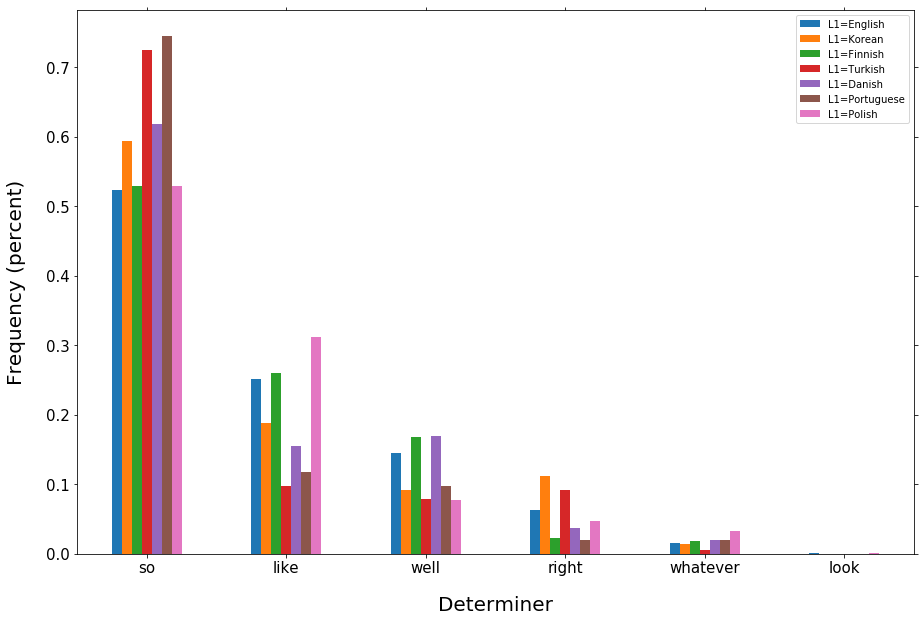

,L1=English,L1=Korean,L1=Finnish,L1=Turkish,L1=Danish,L1=Portuguese,L1=Polish
so,0.523096,0.593857,0.529274,0.72561,0.61834,0.745098,0.529412
like,0.252185,0.187713,0.259953,0.097561,0.154895,0.117647,0.311765
well,0.144819,0.0921502,0.168618,0.0792683,0.169765,0.0980392,0.0776471
right,0.062422,0.112628,0.0234192,0.0914634,0.0371747,0.0196078,0.0470588
whatever,0.0162297,0.0136519,0.0187354,0.00609756,0.0198265,0.0196078,0.0329412
look,0.00124844,0,0,0,0,0,0.00117647


In [40]:
#Get the frequencies of each discourse marker (like, look, right, so, well, whatever), for each L1
discourse_markers = eng_dm_freqs.most_common()
discourse_markers = [b[0] for b in discourse_markers]

dm_words_df = pd.DataFrame(index = discourse_markers, columns = ['L1=English', 'L1=Korean', 'L1=Finnish', 'L1=Turkish', 'L1=Danish', 'L1=Portuguese', 'L1=Polish'])

for word in discourse_markers:
    dm_words_df['L1=English'][word] = eng_dm_freqs[word]/sum(eng_dm_freqs.values())
    dm_words_df['L1=Korean'][word] = kor_dm_freqs[word]/sum(kor_dm_freqs.values())
    dm_words_df['L1=Finnish'][word] = fin_dm_freqs[word]/sum(fin_dm_freqs.values())
    dm_words_df['L1=Turkish'][word] = tur_dm_freqs[word]/sum(tur_dm_freqs.values())
    dm_words_df['L1=Danish'][word] = dan_dm_freqs[word]/sum(dan_dm_freqs.values())
    dm_words_df['L1=Portuguese'][word] = por_dm_freqs[word]/sum(por_dm_freqs.values())
    dm_words_df['L1=Polish'][word] = pol_dm_freqs[word]/sum(pol_dm_freqs.values())

    
dm_words_df.plot(kind='bar', figsize=(15,10))
plt.tick_params(axis = 'both', reset=True, labelsize=15)
plt.legend(prop={'size':20})
bar_width = 0.4
L=plt.legend()
plt.xlabel("Determiner", fontsize= 20, labelpad = 20)
plt.ylabel("Frequency (percent)", fontsize= 20, labelpad = 20)
plt.show()    
    

dm_words_df

## Comparing Article/Determiner Use

### Proportion of determiners

In [35]:
#Get the total number of words for the L1 text
def num_words(li):
    count = 0
    for u in li:
        count += len(u)
    
    return count

In [36]:
#Return the number of determiners in the list passed in
def determiner_words(li):
    words = []
    
    for utterance in li:
        for pair in utterance:
            if pair[1] == "DTfDT":
                words.append(pair[0].replace("\n", ""))
    
    return words

In [37]:
#Create a data frame containing the percentage of determiners for each L1 group

det_df = pd.DataFrame(index = ['determiner proportions'], columns = ['L1=English', 'L1=Korean', 'L1=Finnish', 'L1=Turkish', 'L1=Danish', 'L1=Portuguese', 'L1=Polish'])

eng_dets = determiner_words(eng_speech)
kor_dets = determiner_words(kor_speech)
fin_dets = determiner_words(fin_speech)
tur_dets = determiner_words(tur_speech)
dan_dets = determiner_words(dan_speech)
por_dets = determiner_words(por_speech)
pol_dets = determiner_words(pol_speech)

det_df['L1=English'] = len(eng_dets)/len(eng_toks)
det_df['L1=Korean'] = len(kor_dets)/len(kor_toks)
det_df['L1=Finnish'] = len(fin_dets)/len(fin_toks)
det_df['L1=Turkish'] = len(tur_dets)/len(tur_toks)
det_df['L1=Danish'] = len(dan_dets)/len(dan_toks)
det_df['L1=Portuguese'] = len(por_dets)/len(por_toks)
det_df['L1=Polish'] = len(pol_dets)/len(pol_toks)

det_df

,L1=English,L1=Korean,L1=Finnish,L1=Turkish,L1=Danish,L1=Portuguese,L1=Polish
determiner proportions,0.092807,0.085427,0.107176,0.106683,0.106743,0.107973,0.094908


### Comparing specfic determiner words

In [38]:
eng_det_words = nltk.FreqDist(eng_dets)
kor_det_words = nltk.FreqDist(kor_dets)
fin_det_words = nltk.FreqDist(fin_dets)
tur_det_words = nltk.FreqDist(tur_dets)
dan_det_words = nltk.FreqDist(dan_dets)
por_det_words = nltk.FreqDist(por_dets)
pol_det_words = nltk.FreqDist(pol_dets)

In [39]:
#Create a dataframe showing the frequencies of each determiner for each L1
det_words = eng_det_words.most_common()
det_words = [b[0] for b in det_words]

det_words_df = pd.DataFrame(index = det_words, columns = ['L1=English', 'L1=Korean', 'L1=Finnish', 'L1=Turkish', 'L1=Danish', 'L1=Portuguese', 'L1=Polish'])

for word in det_words:
    det_words_df['L1=English'][word] = eng_det_words[word]/len(eng_toks)
    det_words_df['L1=Korean'][word] = kor_det_words[word]/len(kor_toks)
    det_words_df['L1=Finnish'][word] = fin_det_words[word]/len(fin_toks)
    det_words_df['L1=Turkish'][word] = tur_det_words[word]/len(tur_toks)
    det_words_df['L1=Danish'][word] = dan_det_words[word]/len(dan_toks)
    det_words_df['L1=Portuguese'][word] = por_det_words[word]/len(por_toks)
    det_words_df['L1=Polish'][word] = pol_det_words[word]/len(pol_toks)
det_words_df

,L1=English,L1=Korean,L1=Finnish,L1=Turkish,L1=Danish,L1=Portuguese,L1=Polish
the,0.0406318,0.0398819,0.0539406,0.0626998,0.0489002,0.0549302,0.0509173
a,0.0178155,0.0127719,0.0151697,0.0140373,0.0213677,0.0163106,0.011668
that,0.0147108,0.0094584,0.0138997,0.0113858,0.0148984,0.00660511,0.00638018
this,0.00683447,0.00885596,0.0102307,0.00600484,0.00808661,0.0137494,0.0140513
some,0.00254209,0.00668715,0.00225781,0.00327536,0.0026448,0.00431354,0.00245773
an,0.00245874,0.000421712,0.00201087,0.00116977,0.00323464,0.00155018,0.00109233
all,0.00195866,0.00174709,0.00201087,0.00194962,0.00213106,0.00269596,0.00181227
these,0.0018128,0.000903669,0.00268115,0.0015597,0.00121775,0.00141538,0.000744768
any,0.000958493,0.00126514,0.00105835,0.00124776,0.000932339,0.00155018,0.00131576
those,0.000812635,0.000662691,0.00116419,0.00132574,0.00078012,0.00128058,0.00139023
